# Explore here

In [95]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


Paso 1: Carga del conjunto de datos

Verificando ruta: C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train
La ruta base existe: C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train
Archivos de imágenes de perros en C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg', 'dog.10005.jpg', 'dog.10006.jpg', 'dog.10007.jpg', 'dog.10008.jpg', 'dog.10009.jpg', 'dog.1001.jpg', 'dog.10010.jpg', 'dog.10011.jpg', 'dog.10012.jpg', 'dog.10013.jpg', 'dog.10014.jpg', 'dog.10015.jpg', 'dog.10016.jpg', 'dog.10017.jpg', 'dog.10018.jpg', 'dog.10019.jpg', 'dog.1002.jpg', 'dog.10020.jpg', 'dog.10021.jpg', 'dog.10022.jpg', 'dog.10023.jpg', 'dog.10024.jpg', 'dog.10025.jpg', 'dog.10026.jpg', 'dog.10027.jpg', 'dog.10028.jpg', 'dog.10029.jpg', 'dog.1003.jpg', 'dog.10030.jpg

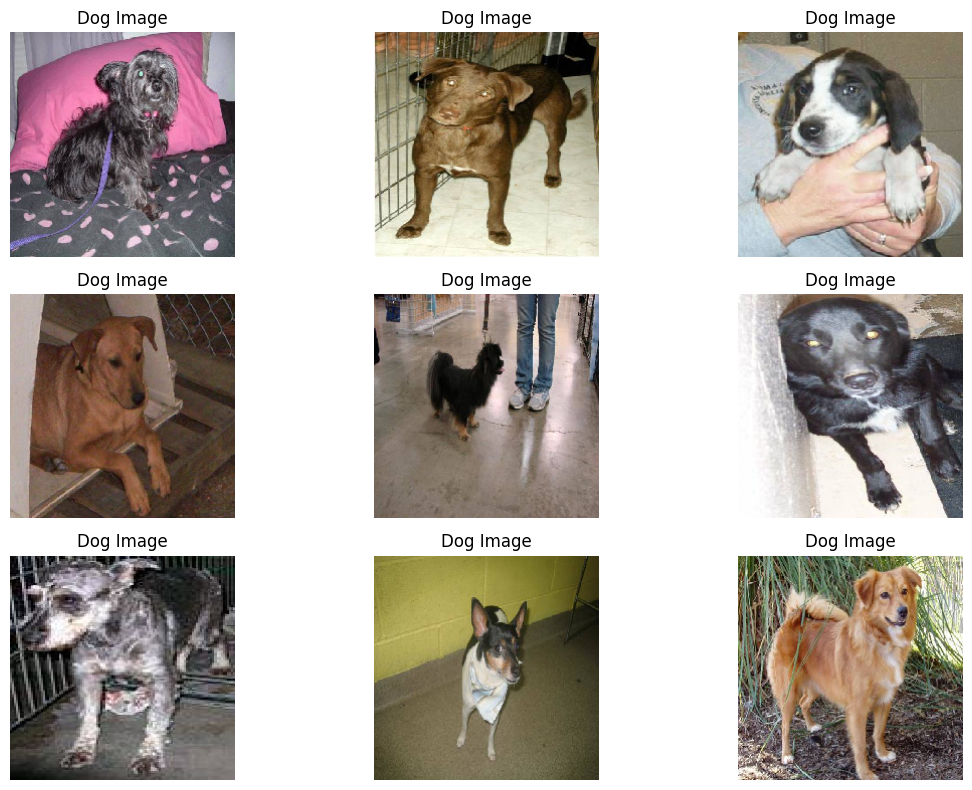

In [96]:
# Ruta de la carpeta que contiene las imágenes
data_dir = r"C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train"

# Verificar la existencia de la ruta base
print(f"Verificando ruta: {data_dir}")
if not os.path.exists(data_dir):
    print(f"La ruta base no existe: {data_dir}")
else:
    print(f"La ruta base existe: {data_dir}")

    try:
        # Obtener una lista de todos los nombres de archivos de imágenes que contienen "dog" en su nombre
        dog_image_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f)) and 'dog' in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]
        
        # Imprimir la lista de archivos de imágenes de perros
        print(f"Archivos de imágenes de perros en {data_dir}: {dog_image_files}")

        # Limitar a las primeras 9 imágenes si hay más
        num_images_to_load = min(9, len(dog_image_files))
        images = []

        # Cargar y procesar las imágenes
        for i in range(num_images_to_load):
            img_path = os.path.join(data_dir, dog_image_files[i])
            img = image.load_img(img_path, target_size=(224, 224))  # Ajusta el tamaño según sea necesario
            img_array = image.img_to_array(img)
            img_array /= 255.0  # Normalizar los valores de los píxeles a [0, 1]
            images.append(img_array)

        # Crear una única figura para mostrar las nueve imágenes
        plt.figure(figsize=(12, 8))

        for i in range(num_images_to_load):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i])
            plt.title('Dog Image')
            plt.axis('off')

        # Ajustar el diseño
        plt.tight_layout()

        # Mostrar las imágenes
        plt.show()

    except Exception as e:
        print(f"Ocurrió un error al listar los archivos o cargar las imágenes: {e}")


Verificando ruta: C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train
La ruta base existe: C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train
Archivos de imágenes de gatos en C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg'

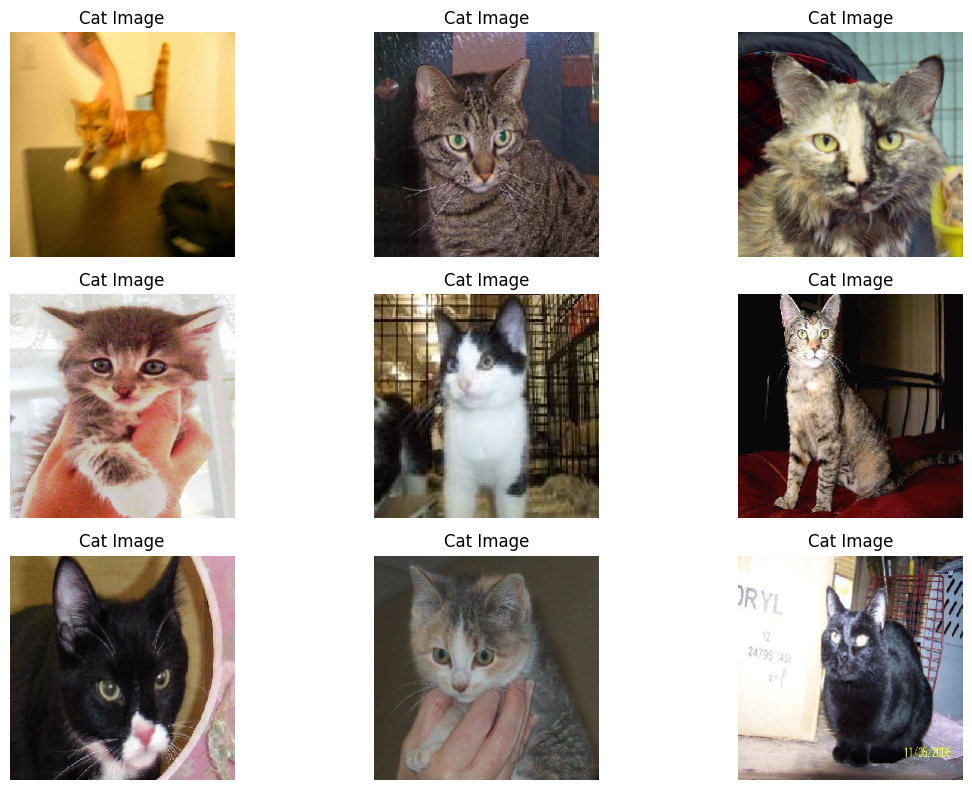

In [97]:
# Ruta de la carpeta que contiene las imágenes
data_dir = r"C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train"

# Verificar la existencia de la ruta base
print(f"Verificando ruta: {data_dir}")
if not os.path.exists(data_dir):
    print(f"La ruta base no existe: {data_dir}")
else:
    print(f"La ruta base existe: {data_dir}")

    try:
        # Obtener una lista de todos los nombres de archivos de imágenes que contienen "cat" en su nombre
        cat_image_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f)) and 'cat' in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]
        
        # Imprimir la lista de archivos de imágenes de gatos
        print(f"Archivos de imágenes de gatos en {data_dir}: {cat_image_files}")

        # Limitar a las primeras 9 imágenes si hay más
        num_images_to_load = min(9, len(cat_image_files))
        images = []

        # Cargar y procesar las imágenes
        for i in range(num_images_to_load):
            img_path = os.path.join(data_dir, cat_image_files[i])
            img = image.load_img(img_path, target_size=(224, 224))  # Ajusta el tamaño según sea necesario
            img_array = image.img_to_array(img)
            img_array /= 255.0  # Normalizar los valores de los píxeles a [0, 1]
            images.append(img_array)

        # Crear una única figura para mostrar las nueve imágenes
        plt.figure(figsize=(12, 8))

        for i in range(num_images_to_load):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i])
            plt.title('Cat Image')
            plt.axis('off')

        # Ajustar el diseño
        plt.tight_layout()

        # Mostrar las imágenes
        plt.show()

    except Exception as e:
        print(f"Ocurrió un error al listar los archivos o cargar las imágenes: {e}")


Paso 2: Visualiza la información de entrada

In [98]:
import pandas as pd
import os

# Definir la ruta de las imágenes de entrenamiento y prueba
train_dir = r"C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train"
test_dir = r"C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\test1"
image_size = (200, 200)

# Crear una lista con las rutas de todas las imágenes y sus etiquetas
train_images = []
train_labels = []

for filename in os.listdir(train_dir):
    if filename.startswith('cat'):
        train_labels.append('cat')
    elif filename.startswith('dog'):
        train_labels.append('dog')
    train_images.append(os.path.join(train_dir, filename))

# Crear un DataFrame para entrenamiento
train_df = pd.DataFrame({
    'filename': train_images,
    'class': train_labels
})

# Crear una lista con las rutas de todas las imágenes de prueba
test_images = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]

# Crear un DataFrame para prueba
test_df = pd.DataFrame({
    'filename': test_images
})

# Verificar los DataFrames
print(train_df.head())
print(test_df.head())


                                            filename class
0  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...   cat
1  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...   cat
2  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...   cat
3  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...   cat
4  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...   cat
                                            filename
0  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...
1  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...
2  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...
3  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...
4  C:\Users\Usuario\OneDrive\Escritorio\4GeeksAca...


In [99]:
# Crear instancias de ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generación de datos de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)

# Generación de datos de prueba (sin etiquetas)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col=None,
    target_size=image_size,
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 25000 validated image filenames belonging to 2 classes.
Found 12500 validated image filenames.


In [100]:
# Configurar el uso de GPU si está disponible
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU activada")
    except RuntimeError as e:
        print(e)

# Definir la estructura del modelo
model = Sequential()
model.add(Conv2D(input_shape=(128, 128, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Crear generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Añadido validation_split
test_datagen = ImageDataGenerator(rescale=1./255)

# Definir las rutas de los datos de entrenamiento y prueba
train_dir = r"C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\train"
test_dir = r"C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\test1"
image_size = (128, 128)

# Crear DataFrames para los datos de entrenamiento y prueba
train_images = []
train_labels = []

for filename in os.listdir(train_dir):
    if filename.startswith('cat'):
        train_labels.append("cat")
    elif filename.startswith('dog'):
        train_labels.append("dog")
    train_images.append(os.path.join(train_dir, filename))

train_df = pd.DataFrame({
    'filename': train_images,
    'class': train_labels
})

test_images = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]
test_df = pd.DataFrame({
    'filename': test_images
})

# Crear generadores de datos a partir de los DataFrames
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='training'  # Añadido subset
)

validation_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Añadido subset
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col=None,
    target_size=image_size,
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Configurar callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[checkpoint, early_stopping]
)

# Evaluar el modelo en los datos de entrenamiento
results = model.evaluate(train_generator)
print(f"Train Loss: {results[0]}, Train Accuracy: {results[1]}")

# Evaluar el modelo en los datos de prueba
results = model.evaluate(validation_generator)
print(f"Validation Loss: {results[0]}, Validation Accuracy: {results[1]}")

# Realizar predicciones en el conjunto de datos de prueba
predictions = model.predict(test_generator, steps=test_generator.n // test_generator.batch_size, verbose=1)

# Opcional: Si tienes etiquetas de prueba, evalúa manualmente las predicciones
# Si no, solo imprime las predicciones
print(predictions)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12500 validated image filenames.
Epoch 1/10


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 259ms/step - accuracy: 0.6614 - loss: 0.6084 - val_accuracy: 0.5170 - val_loss: 0.8044
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.0224
Epoch 3/10


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 265ms/step - accuracy: 0.7572 - loss: 0.4917 - val_accuracy: 0.6803 - val_loss: 0.6520
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6853
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 268ms/step - accuracy: 0.7983 - loss: 0.4350 - val_accuracy: 0.7782 - val_loss: 0.4914
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3361
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8226 - loss: 0.3876 - val_accuracy: 0.5467 - val_loss: 0.9291
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.9169
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.8422 - loss: 0.3574 - val_accuracy: 0.7240 - val_loss: 0.5939
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.0000e

PREDICCION DE IMAGENES

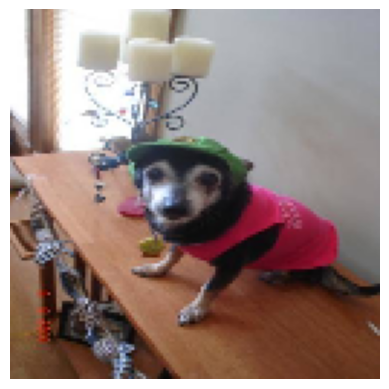

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
dog


In [102]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
saved_model = load_model('best_model.keras')

# Definir la función de predicción
def predict_image(img_path, model, target_size):
    # Cargar la imagen
    img = image.load_img(img_path, target_size=target_size)
    img = np.asarray(img)

    # Mostrar la imagen
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocesar la imagen
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalizar la imagen al igual que en el entrenamiento

    # Hacer la predicción
    output = model.predict(img)

    # Mostrar el resultado
    if output[0][0] > output[0][1]:
        print("cat")
    else:
        print("dog")

# Ruta de la imagen de prueba
img_path = r"C:\Users\Usuario\OneDrive\Escritorio\4GeeksAcademy\Deep_Learning\Deep_Learning\data\raw\test1\105.jpg"

# Predecir la imagen
predict_image(img_path, saved_model, target_size=(128, 128))
